<a href="https://colab.research.google.com/github/shubh8794/BigMartSalesPrediction/blob/master/Porter_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Oolala Case Study**

**Objective** : Validate the reliability of successful cab booking to the Airport.

**Business Use Case** : Oolala, a cab aggregator service, has a problem statement which they want you to validate and provide an explanation backed by numbers. It is observed and reported that customers are not able to find cabs to go to the Airport as drivers are canceling airport trips. They want you to investigate if this is indeed true.

In [0]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
        
import warnings
warnings.filterwarnings("ignore")

In [0]:
#Loading data
cabs_data = pd.read_csv("Oolala Cabs Case Study - Sheet1.csv")
print(cabs_data.shape)
cabs_data.head()

(20205, 11)


,order_id,status,customer_id,driver_id,pickup_time,start_time,drop_time,pickup_loc,drop_loc,travel_distance,cancelled_by
0,4824156,4,305169,10.0,1/2/19 13:10,1/2/19 13:32,1/2/19 14:04,Andheri West,Juhu,1.70,NaN
1,4826642,4,498734,10.0,1/2/19 16:45,1/2/19 17:01,1/2/19 21:08,Andheri East,Kalyan,47.03,NaN
2,4830467,4,125080,10.0,1/3/19 11:25,1/3/19 11:30,1/3/19 13:02,Andheri West,Bandra West,7.93,NaN
3,4832599,4,107008,10.0,1/3/19 14:50,1/3/19 14:37,1/3/19 15:09,Juhu,Jogeshwari West,6.35,NaN
4,4833444,4,278997,10.0,1/3/19 15:36,1/3/19 15:42,1/3/19 17:29,Jogeshwari West,Saki Naka,8.48,NaN


In [0]:
#Eliminating duplicates records
cabs_data = cabs_data.drop_duplicates().reset_index(drop=True)
cabs_data.shape

(20168, 11)

Before moving forward we need to divide the data into cancelled trips and completed trips and then analyse them together

In [0]:
# get cancelled rides data
cancelled_trips = cabs_data[cabs_data['status'] == 5]
cancelled_trips.head()
cancelled_trips.shape

(4553, 11)

In [0]:
# get completed rides data
completed_trips = cabs_data[cabs_data['status'] == 4]
completed_trips.head()
completed_trips.shape

(15615, 11)

In [0]:
cancelled_trips.head()

,order_id,status,customer_id,driver_id,pickup_time,start_time,drop_time,pickup_loc,drop_loc,travel_distance,cancelled_by
6,4844720,5,85188,10.0,1/5/19 10:50,NaN,NaN,Juhu,Churchgate,26.05,system_nodriver_accepted
10,4861999,5,306868,10.0,1/7/19 17:45,NaN,NaN,Goregaon West,Jogeshwari West,2.43,customer
12,4865604,5,460916,10.0,1/8/19 12:55,NaN,NaN,Jogeshwari West,Powai,7.34,driver
13,4868256,5,223853,10.0,1/8/19 17:00,NaN,NaN,Jogeshwari West,Aarey,3.54,customer
18,4885165,5,252522,10.0,1/10/19 18:17,NaN,NaN,Andheri West,Byculla,18.52,customer


In [0]:
completed_trips.head()

,order_id,status,customer_id,driver_id,pickup_time,start_time,drop_time,pickup_loc,drop_loc,travel_distance,cancelled_by
0,4824156,4,305169,10.0,1/2/19 13:10,1/2/19 13:32,1/2/19 14:04,Andheri West,Juhu,1.70,NaN
1,4826642,4,498734,10.0,1/2/19 16:45,1/2/19 17:01,1/2/19 21:08,Andheri East,Kalyan,47.03,NaN
2,4830467,4,125080,10.0,1/3/19 11:25,1/3/19 11:30,1/3/19 13:02,Andheri West,Bandra West,7.93,NaN
3,4832599,4,107008,10.0,1/3/19 14:50,1/3/19 14:37,1/3/19 15:09,Juhu,Jogeshwari West,6.35,NaN
4,4833444,4,278997,10.0,1/3/19 15:36,1/3/19 15:42,1/3/19 17:29,Jogeshwari West,Saki Naka,8.48,NaN


**Factors to be considered**:

1. Most of the trips cancelled are for a particular route.
2. Cabs booked for larger distances are mostly cancelled by drivers.
3. There might be some outlier (particular customer or driver cancelled the most rides)
4. Rides not accepted by drivers from particular location frequently.
5. Cabs cancelled mostly during certain time interval.

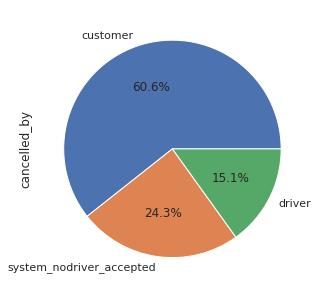

In [0]:
cancelled_trips['cancelled_by'].value_counts().plot.pie(y='cancelled_by', figsize=(5, 5), autopct='%1.1f%%')

From the above plot we can say that mostly rides are cancelled by customers.

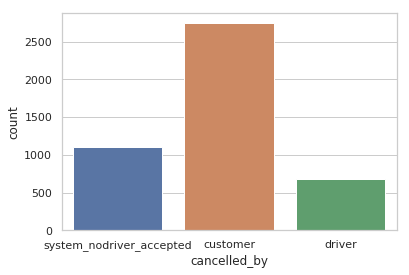

In [0]:
sns.countplot(x="cancelled_by", data= cancelled_trips)

In [0]:
cancelled_trips['time'] = cancelled_trips['pickup_time'].apply(lambda x : x.split(' ')[-1])
cancelled_trips['date'] = cancelled_trips['pickup_time'].apply(lambda x : x.split(' ')[0])
cancelled_trips.head()

,order_id,status,customer_id,driver_id,pickup_time,start_time,drop_time,pickup_loc,drop_loc,travel_distance,cancelled_by,time,date
6,4844720,5,85188,10.0,1/5/19 10:50,NaN,NaN,Juhu,Churchgate,26.05,system_nodriver_accepted,10:50,1/5/19
10,4861999,5,306868,10.0,1/7/19 17:45,NaN,NaN,Goregaon West,Jogeshwari West,2.43,customer,17:45,1/7/19
12,4865604,5,460916,10.0,1/8/19 12:55,NaN,NaN,Jogeshwari West,Powai,7.34,driver,12:55,1/8/19
13,4868256,5,223853,10.0,1/8/19 17:00,NaN,NaN,Jogeshwari West,Aarey,3.54,customer,17:00,1/8/19
18,4885165,5,252522,10.0,1/10/19 18:17,NaN,NaN,Andheri West,Byculla,18.52,customer,18:17,1/10/19


In [0]:
completed_trips['time'] = completed_trips['start_time'].apply(lambda x : x.split(' ')[-1])
completed_trips['date'] = completed_trips['start_time'].apply(lambda x : x.split(' ')[0])
completed_trips.head()

,order_id,status,customer_id,driver_id,pickup_time,start_time,drop_time,pickup_loc,drop_loc,travel_distance,cancelled_by,time,date
0,4824156,4,305169,10.0,1/2/19 13:10,1/2/19 13:32,1/2/19 14:04,Andheri West,Juhu,1.70,NaN,13:32,1/2/19
1,4826642,4,498734,10.0,1/2/19 16:45,1/2/19 17:01,1/2/19 21:08,Andheri East,Kalyan,47.03,NaN,17:01,1/2/19
2,4830467,4,125080,10.0,1/3/19 11:25,1/3/19 11:30,1/3/19 13:02,Andheri West,Bandra West,7.93,NaN,11:30,1/3/19
3,4832599,4,107008,10.0,1/3/19 14:50,1/3/19 14:37,1/3/19 15:09,Juhu,Jogeshwari West,6.35,NaN,14:37,1/3/19
4,4833444,4,278997,10.0,1/3/19 15:36,1/3/19 15:42,1/3/19 17:29,Jogeshwari West,Saki Naka,8.48,NaN,15:42,1/3/19


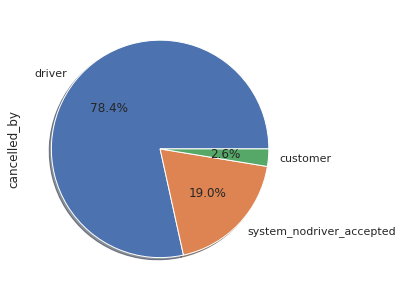

In [113]:
# Cancellation distribution for airport trips
cancelled_trips[cancelled_trips['drop_loc'] == "Airport"]['cancelled_by'].value_counts().plot.pie(y='cancelled_by', shadow = True, figsize=(5, 5), autopct='%1.1f%%')

From the above plot we can say that most of the rides for **Airport** are cancelled by drivers or due to unavailability of cabs.

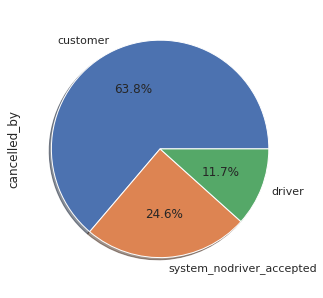

In [114]:
# Cancellation distribution for trips other than airport
cancelled_trips[cancelled_trips['drop_loc'] != "Airport"]['cancelled_by'].value_counts().plot.pie(y='cancelled_by', shadow = True, figsize=(5, 5), autopct='%1.1f%%')

In [63]:
cancelled_trips['travel_distance'].median()

14.81

In [65]:
cancelled_rides_to_airport = cancelled_trips[cancelled_trips['drop_loc'] == "Airport"]
cancelled_rides_to_airport.groupby(['cancelled_by'])['travel_distance'].median()


cancelled_by
customer                    18.105
driver                      38.205
system_nodriver_accepted     9.935
Name: travel_distance, dtype: float64

From the data above we can say that drivers cancelled the rides for airport due to large travel distance but we need to analyse is there any particular time that contributed most to it or any particular day or any particular driver before reaching to conclusion.

In [115]:
cancelled_trips[cancelled_trips['drop_loc'] != "Airport"].groupby(['cancelled_by'])['travel_distance'].mean().reset_index()

,cancelled_by,travel_distance
0,customer,16.585970
1,driver,14.732480
2,system_nodriver_accepted,21.825313


For the trips other than Airport most of the trips are cancelled by customers and travel distance is also not large in this case. So there is no a pattern observed here. 

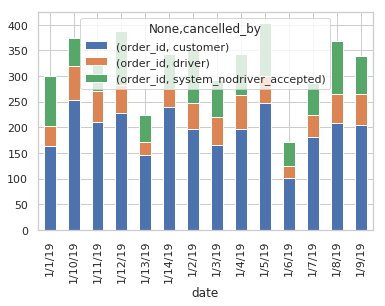

In [0]:
# Exploring cancellation of rides on different date
date_wise_cancelled_trips = cancelled_trips.groupby(['date', 'cancelled_by'])['order_id'].count().reset_index()
df1= date_wise_cancelled_trips.pivot(columns='cancelled_by',index='date')
df1.plot(kind='bar',stacked=True,legend= True)

From the above plot we can conclude that none of the above days going against the pattern. Every day customers, drivers and system_nodriver_accepted have significant contribution to the number of cancellation of rides. 

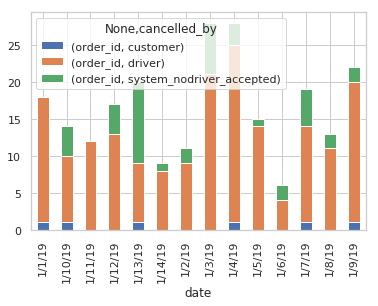

In [67]:
# Exploring cancellation of rides on different date for airport
date_wise_cancelled_trips_to_airport = cancelled_rides_to_airport.groupby(['date', 'cancelled_by'])['order_id'].count().reset_index()
df1= date_wise_cancelled_trips_to_airport.pivot(columns='cancelled_by',index='date')
df1.plot(kind='bar',stacked=True,legend= True)

From the above plot we can say that everyday most of the rides to airport are cancelled by drivers irrespective of date.

In [79]:
print("Total cancelled rides to airport :" + str(len(cancelled_rides_to_airport)))
print("Maximum cancelled rides to airport by a sinlge driver :" + str(cancelled_rides_to_airport.groupby(['driver_id'])['order_id'].count().max()))
print("Maximum cancelled rides to airport by a single customer :" + str(cancelled_rides_to_airport.groupby(['customer_id'])['order_id'].count().max()))

Total cancelled rides to airport :232
Maximum cancelled rides to airport by a sinlge driver :2
Maximum cancelled rides to airport by a single customer :5


From the above data we can conclude that none of the driver is majorly responsible for cancellation of trips to Airport.

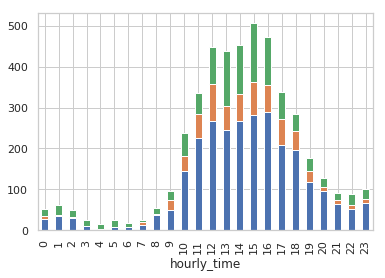

In [0]:
# Exploring cancellation of rides on different time
cancelled_trips['hourly_time'] = cancelled_trips['time'].apply(lambda x : x.split(':')[0])
cancelled_trips['hourly_time'] = cancelled_trips['hourly_time'].astype('int')
time_wise_cancelled_trips = cancelled_trips.groupby(['hourly_time', 'cancelled_by'])['order_id'].count().reset_index()
df2= time_wise_cancelled_trips.pivot(columns='cancelled_by',index='hourly_time')
df2.plot(kind='bar',stacked=True, legend= False)

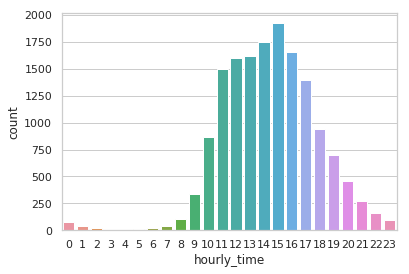

In [0]:
# Exploring completed rides on different time
completed_trips['hourly_time'] = completed_trips['time'].apply(lambda x : x.split(':')[0])
completed_trips['hourly_time'] = completed_trips['hourly_time'].astype('int')
sns.countplot(x="hourly_time", data= completed_trips)

From the above two plots we can say that most of the rides are completed and cancelled during day time between 9 am to 9 pm. Now we need to figure our relative cancellation frequency of rides.

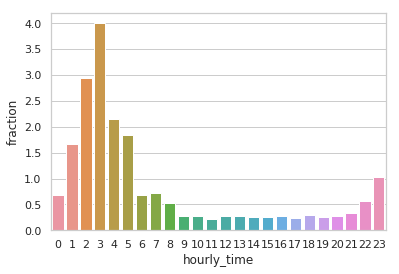

In [0]:
# Relative cancellation wrt completed for different time
df2.columns = df2.columns.droplevel(0)
df2['total_cancelled_each_hour'] = df2.sum(axis=1)
df2 = df2.reset_index()
completed_trips_each_hour = pd.DataFrame(completed_trips['hourly_time'].value_counts().reset_index())
completed_trips_each_hour.columns = ['hourly_time', 'total_completed_each_hour']
df3 = pd.merge(df2, completed_trips_each_hour, on = "hourly_time", how = "inner")
df3['hourly_time'] = df3['hourly_time'].astype('int')
df3['fraction'] = pd.to_numeric(df3['total_cancelled_each_hour'])/pd.to_numeric(df3['total_completed_each_hour'])
sns.barplot(x="hourly_time", y = "fraction", data= df3)

From the above plot we can interpret that more rides are cancelled than completed after 11 PM and reaches to maximum around 3 AM and then decreases after that. Now we need to look into how many rides between that time is cancelled by system due to unavaiabilty and the drivers. 

After that we can analyse the number of rides booked for Airport during that time as well. 

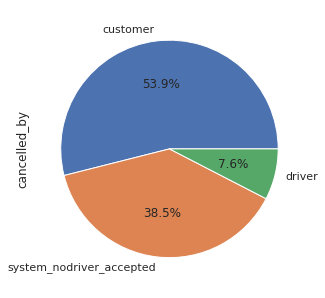

In [0]:
# Cancellation distribution duridng peak cancellation hours
cancelled_rides_during_night = cancelled_trips[cancelled_trips['hourly_time'].isin([23, 0, 1, 2, 3, 4, 5])]
cancelled_rides_during_night['cancelled_by'].value_counts().plot.pie(y='cancelled_by', figsize=(5, 5), autopct='%1.1f%%')

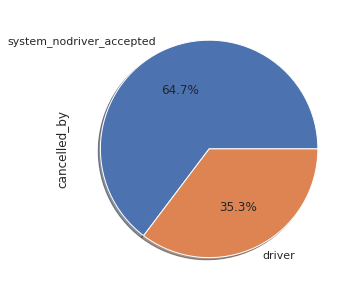

In [0]:
# Cancellation distribution during peak cancellation hours for airport trips
cancelled_rides_during_night[cancelled_rides_during_night['drop_loc'] == "Airport"]['cancelled_by'].value_counts().plot.pie(y='cancelled_by', shadow = True, figsize=(5, 5), autopct='%1.1f%%')

From the above plot we can say that during night time when all cabs to the airport are either cancelled by drivers or system and none of them by the customers. Given that contribution to total cancellation number is dominated by customers.

In [0]:
cancelled_rides_during_night_to_airport = cancelled_rides_during_night[cancelled_rides_during_night['drop_loc'] == "Airport"]
cancelled_rides_during_night_to_airport.groupby(['cancelled_by', 'pickup_loc'])['order_id'].count()

cancelled_by              pickup_loc     
driver                    Airoli             1
                          Jogeshwari West    2
                          Kandiwali West     1
                          Marol              1
                          Powai              1
system_nodriver_accepted  Govandi            1
                          Nerul              8
                          Rabale             2
Name: order_id, dtype: int64

From the above data we can conclude that rides for Airport are mostly cancelled by the dirvers for the locations : Airoli, Jogeshwari West, Kandiwali West, Marol, Powai and system nodriver accepted in the locations Nerul, Govandi and Rabale means that no cabs are found at these locations during night time.

Now we can explore the reason for cancellation by drivers during night time. The reason might be long travel distance. 

In [0]:
cancelled_rides_during_night['travel_distance'].median()

13.055

In [0]:
cancelled_rides_during_night_to_airport.groupby(['cancelled_by', 'pickup_loc'])['travel_distance'].mean()

cancelled_by              pickup_loc     
driver                    Airoli             22.3700
                          Jogeshwari West    42.2150
                          Kandiwali West     57.0300
                          Marol              33.6900
                          Powai              51.0700
system_nodriver_accepted  Govandi            19.0500
                          Nerul               9.5225
                          Rabale             15.4500
Name: travel_distance, dtype: float64

From the above data we can say that our hypothesis holds true. Drivers cancelled the rides because of longer travel distance. Since for all the cancelled rides during night hours median travel time is 13 min and rides cancelled by  drivers have to travel significantly large distance.

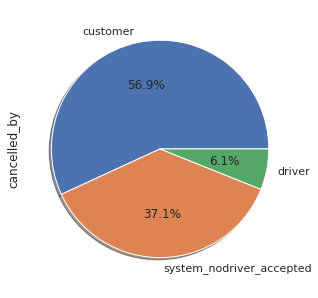

In [0]:
# Cancellation distribution during peak cancellation hours for locations other than airport
cancelled_rides_during_night[cancelled_rides_during_night['drop_loc'] != "Airport"]['cancelled_by'].value_counts().plot.pie(y='cancelled_by', shadow = True, figsize=(5, 5), autopct='%1.1f%%')

In [0]:
cancelled_rides_during_night_not_to_airport = cancelled_rides_during_night[cancelled_rides_during_night['drop_loc'] != "Airport"]
cancelled_rides_during_night_not_to_airport.groupby(['pickup_loc', 'cancelled_by'])['order_id'].count().reset_index()

,pickup_loc,cancelled_by,order_id
0,Aarey,customer,2
1,Aarey,driver,1
2,Agra Road,customer,2
3,Airoli,customer,1
4,Airport,customer,8
5,Airport,driver,1
6,Airport,system_nodriver_accepted,14
7,Andheri East,customer,2
8,Andheri East,driver,1
9,Anjurphata,customer,6


In [0]:
cancelled_rides_during_night_not_to_airport.groupby(['cancelled_by'])['travel_distance'].mean().reset_index()

,cancelled_by,travel_distance
0,customer,16.163989
1,driver,12.830526
2,system_nodriver_accepted,20.257672


For the rides other than airport there is no pattern observed in cancellation of rides.

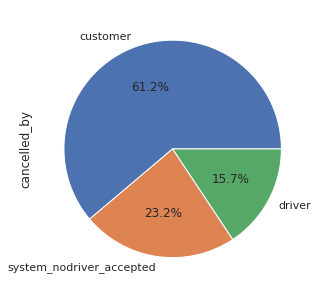

In [0]:
# Cancellation distribution duridng day hours
cancelled_rides_during_day = cancelled_trips[~cancelled_trips['hourly_time'].isin([23, 0, 1, 2, 3, 4, 5])]
cancelled_rides_during_day['cancelled_by'].value_counts().plot.pie(y='cancelled_by', figsize=(5, 5), autopct='%1.1f%%')

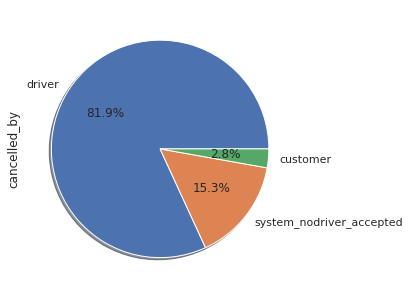

In [0]:
# Cancellation distribution during day hours for airport trips
cancelled_rides_during_day[cancelled_rides_during_day['drop_loc'] == "Airport"]['cancelled_by'].value_counts().plot.pie(y='cancelled_by', shadow = True, figsize=(5, 5), autopct='%1.1f%%')

As from the above plot we can say that most of the trips to the airport are cancelled by drivers.

In [61]:
cancelled_rides_during_day_to_airport = cancelled_rides_during_day[cancelled_rides_during_day['drop_loc'] == "Airport"]
cancelled_rides_during_day_to_airport.groupby(['cancelled_by'])['order_id'].count()

cancelled_by
customer                      6
driver                      176
system_nodriver_accepted     33
Name: order_id, dtype: int64

In [0]:
cancelled_rides_during_day['travel_distance'].median()

14.95

In [56]:
cancelled_rides_during_day_to_airport.groupby(['cancelled_by'])['travel_distance'].median()

cancelled_by
customer                    18.105
driver                      37.975
system_nodriver_accepted     9.260
Name: travel_distance, dtype: float64

From the above data we can say that as 81.9% cancellation by drivers in the day time for airport due to larger travel time. 

In [101]:
# Frequency of locations from where most cancelled cabs were booked
top_cancelled_routes = cancelled_trips.groupby(['pickup_loc', 'drop_loc'])['order_id'].count().reset_index().sort_values(by = 'order_id', ascending = False)
# top_cancelled_routes
pickup_locations_for_airport_with_max_cancellation = top_cancelled_routes[top_cancelled_routes['drop_loc'] == 'Airport'].head(10)['pickup_loc']
top_cancelled_routes[top_cancelled_routes['drop_loc'] == 'Airport'].head(10)

,pickup_loc,drop_loc,order_id
1171,Nerul,Airport,18
1378,Rabale,Airport,15
765,Kalyan,Airport,14
1530,Vashi,Airport,14
836,Kasheli,Airport,13
1297,Powai,Airport,12
1343,Purna,Airport,11
502,Dombivli,Airport,11
234,Bandra West,Airport,9
611,Goregaon West,Airport,7


There are the pickup locations from where maximum number of rides to Airport has been cancelled.

In [0]:
cancelled_trip_max_duration = cancelled_trips.groupby(['pickup_loc', 'drop_loc'])['travel_distance'].median().reset_index().sort_values(by = "travel_distance", ascending = False)

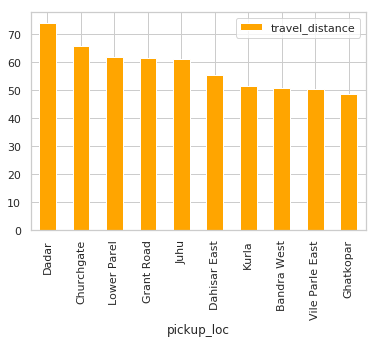

In [81]:
cancelled_trip_max_duration[cancelled_trip_max_duration['drop_loc'] == 'Airport'].head(10).plot.bar(x='pickup_loc', y= 'travel_distance', rot=90, color = 'orange')

There are the farthest locations from the Airport those are cancelled. 

In [109]:
# # Completed trips to airport
# completed_trips_to_airport = completed_trips[completed_trips['drop_loc'] == "Airport"]
# print("Total completed trips to airport :" + str(len(completed_trips_to_airport)))
# completed_trips_where_max_cancellation = completed_trips_to_airport[completed_trips_to_airport['pickup_loc'].isin(pickup_locations_for_airport_with_max_cancellation)]
# print("Total completed trips to airport where maximum cancellation happened :" + str(len(completed_trips_where_max_cancellation)))

Total completed trips to airport :502
Total completed trips to airport where maximum cancellation happened :197


In [0]:
# other_completed_trips = completed_trips_to_airport[~completed_trips_to_airport['pickup_loc'].isin(pickup_locations_for_airport_with_max_cancellation)]
# other_completed_trips